In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# load electric field
with open ('./Plot2/field.dat', 'r') as f:
    field = loadtxt(f)

In [3]:
# load trajectories
# trajectory t6 cycle1 first type
with open ('./Plot2/re_traj_1.dat', 'r') as t1:
    traj_1 = loadtxt(t1)
# trajectory t3 cycle1 second type
with open ('./Plot2/re_traj_9.dat', 'r') as t9:
    traj_9 = loadtxt(t9)
# trajectory t4 cycle1 second type
with open ('./Plot2/re_traj_10.dat', 'r') as t10:
    traj_10 = loadtxt(t10)
# trajectory t2 cycle0 second type
with open ('./Plot2/re_traj_11.dat', 'r') as t11:
    traj_11 = loadtxt(t11)

In [4]:
# calculate weight
with open ('./Plot2/Region12_4_random1_dom1.dat', 'r') as w:
    selc = loadtxt(w)

traj_1_w = selc[1, 6] * selc[1, 6] + selc[1, 7] * selc[1, 7]
traj_9_w = selc[9, 6] * selc[9, 6] + selc[9, 7] * selc[9, 7]
traj_10_w = selc[10, 6] * selc[10, 6] + selc[10, 7] * selc[10, 7]
traj_11_w = selc[11, 6] * selc[11, 6] + selc[11, 7] * selc[11, 7]


In [5]:
# load spectrum
with open ('./Plot2/Spec0.dat', 'r') as s0:
    spec0 = loadtxt(s0)
with open ('./Plot2/Spec1.dat', 'r') as s1:
    spec1 = loadtxt(s1)
with open ('./Plot2/Spec2.dat', 'r') as s2:
    spec2 = loadtxt(s2)
    
spec0[:, 1] = spec0[:, 1]/amax(spec0[:, 1])
spec1[:, 1] = spec1[:, 1]/amax(spec1[:, 1])
spec2[:, 1] = spec2[:, 1]/amax(spec2[:, 1])

In [26]:
Elec = 0.0000001 + abs(field[:, 2])
IonRate = 4.0/Elec*exp(-(2.0/3.0)/Elec-12.0*Elec)
Ei, Eh = 0.5, 0.5 
r = Ei/Eh
def W(E):    #定义电离率
    E = 0.000001 + abs(E)
    return (4.0/E)*r**(5/2)*exp((-2/(3*E))*(r**(3/2)))

In [7]:
ni1 = 1142
n1 = 2000 - ni1
Emission1 = empty((n1, 2))
Emission1[:, 0] = field[ni1:, 0]
Emission1[:, 1] = field[ni1:, 2]
weight1 = IonRate[ni1]
weight1

2.654250950187985e-07

In [8]:
ni2 = 897
n2 = 2000 - ni2
Emission2 = empty((n2, 2))
Emission2[:, 0] = field[ni2:, 0]
Emission2[:, 1] = field[ni2:, 2]
weight2 = IonRate[ni2]

In [9]:
ni3 = 977
n3 = 2000 - ni3
Emission3 = empty((n3, 2))
Emission3[:, 0] = field[ni3:, 0]
Emission3[:, 1] = field[ni3:, 2]
weight3 = IonRate[ni3]

In [10]:
w = 0.05695
nc = 8.
tc = 0.
duration =  2. * np.pi * nc / w
t0 = tc - duration * 0.5
t1 = tc + duration * 0.5
nt = 2000
nte = 20000

In [11]:
thz1 = zeros(nte)
thz1[10142 : 11000] = Emission1[:, 1]
thz2 = zeros(nte)
thz2[9897 : 11000] = Emission2[:, 1]
thz3 = zeros(nte)
thz3[9977 : 11000] = Emission3[:, 1]

In [12]:
thz13 = zeros(nte)
thz13 = thz1 + thz3
fre = fft.fftfreq(nte, d=(t1-t0)/nt) * 2. * np.pi
Fthz13 = fft.fft(thz13)
#plot(fre, log(Fthz13))
#xlim(0, 0.056*10)
thz23 = zeros(nte)
thz23 = thz2 + thz3
fre = fft.fftfreq(nte, d=(t1-t0)/nt) * 2. * np.pi
Fthz23 = fft.fft(thz23)

"\n#ionizationax1 = subplot2grid((1, 20), (0, 0),colspan = 13)\nax4 = subplot2grid((2, 20), (1, 0),colspan = 13)\nax4.plot(field[:, 0]/41, field[:, 2], color = 'r', linewidth=3)\n#ax1.plot(Emission1[:, 0]/41, Emission1[:, 1], color = 'green', label='I')\nax4.set_ylim(-0.13, 0.13)\nYscale=linspace(-0.1, 0.1, 5)\nax4.set_yticks(Yscale)\nax4.set_yticklabels(('-0.10','-0.05','0.0','0.05','0.10'), size = 15)\nXscale=linspace(-4, 4, 9)\nax4.set_xticks(Xscale)\nax4.set_xticklabels(('-4','-3','-2','-1','0.0','1','2','3','4'), size = 15)\n#ax4.axvspan(-1.463, 0.122, facecolor='cyan', alpha=0.3)\n#ax4.axvspan(0.122, 1.22, facecolor='salmon', alpha=0.3)\n#ax4.axvspan(-2.585, -1.463, facecolor='salmon', alpha=0.3)\n#ax4.axvspan(-4.195, -2.585, facecolor='cyan', alpha=0.3)\nax4.set_xlabel('Time (fs)', size = 20)\nax4.set_ylabel('Electric Field (a.u.)', size = 20)\nax4.axvspan(-2.5, 0.142, facecolor='cyan', alpha=0.3)\nax4.axvspan(0.142, 2.786, facecolor='salmon', alpha=0.3)\n#ax4.text(-0.1, 0.113, 

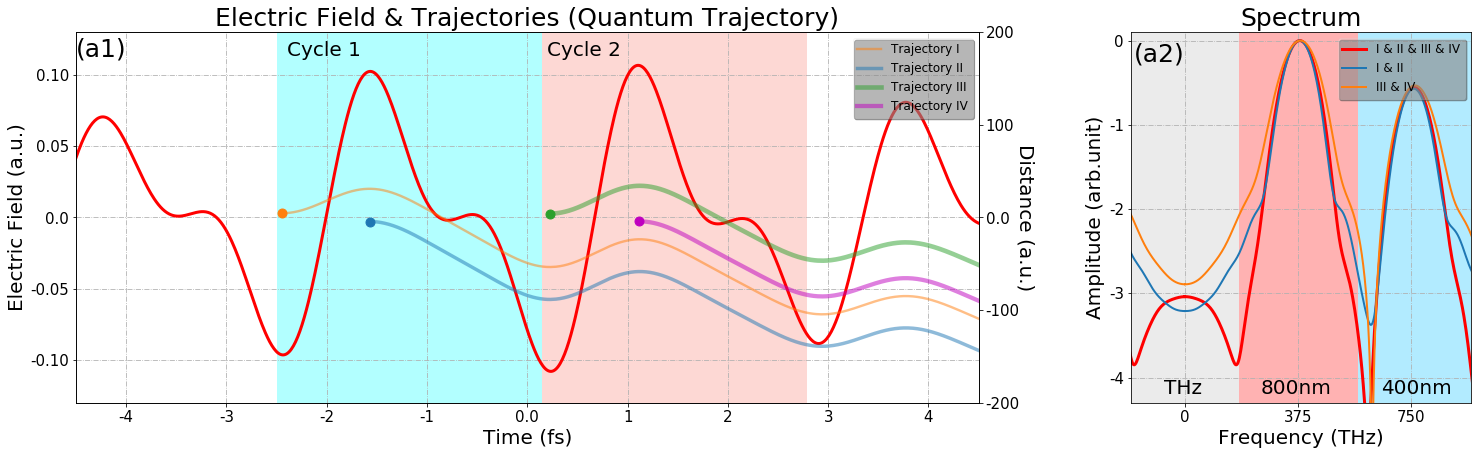

In [13]:
#Size = 13
#nofont = {'fontname':'Times New Roman'}
#chfont = {'fontname':'Arial'}
figsize(25,15)
#matplotlib.rc('xtick',labelsize=Size)
#matplotlib.rc('ytick',labelsize=Size)
fig = figure()
ax1 = subplot2grid((2, 20), (0, 0),colspan = 13)
#fig, (ax1, ax3) = subplots(nrows=1, ncols=2)
ax1.plot(field[:, 0]/41, field[:, 2], color = 'r', linewidth = 3)
ax1.set_ylim(-0.13, 0.13)
Yscale=linspace(-0.1, 0.1, 5)
ax1.set_yticks(Yscale)
ax1.set_yticklabels(('-0.10','-0.05','0.0','0.05','0.10'), size = 15)
Xscale=linspace(-4, 4, 9)
ax1.set_xticks(Xscale)
ax1.set_xticklabels(('-4','-3','-2','-1','0.0','1','2','3','4'), size = 15)
#xlim(-4.5, 4.5)
ax1.grid(True, linestyle = '-.')
ax1.set_xlabel('Time (fs)', size = 20)
ax1.set_ylabel('Electric Field (a.u.)', size = 20)
#ax1.tick_params(labelcolor='black', labelsize='medium', width=5)
ax1.text(0.2, 0.113, 'Cycle 2', fontsize = 20)
#ax1.text(1.0, 0.113, '2', fontsize = 20)
ax1.text(-2.4, 0.113, 'Cycle 1', fontsize = 20)
#ax1.text(-1.7, 0.113, '2', fontsize = 20)
ax1.text(-4.5, 0.113, '(a1)', fontsize = 25)
ax2 = ax1.twinx()
ax2.plot(traj_9[:, 0]/41, traj_9[:, 5], linewidth = traj_9_w * 2000, color='#ff7f0e', label='Trajectory I', alpha=0.5)
ax2.plot(traj_9[0, 0]/41, traj_9[0 ,5], marker='o', color='#ff7f0e', markersize=9) 
ax2.plot(traj_1[:, 0]/41, traj_1[:, 5], linewidth = traj_1_w * 2000, color='#1f77b4', label='Trajectory II', alpha=0.5)
ax2.plot(traj_1[0, 0]/41, traj_1[0 ,5], marker='o', color='#1f77b4', markersize=9) 
ax2.plot(traj_10[:, 0]/41, traj_10[:, 5], linewidth = traj_10_w * 2000, color='#2ca02c', label='Trajectory III', alpha=0.5)
ax2.plot(traj_10[0, 0]/41, traj_10[0 ,5], marker='o', color='#2ca02c', markersize=9) 
ax2.plot(traj_11[:, 0]/41, traj_11[:, 5], color = 'm', linewidth = traj_11_w * 2000, label='Trajectory IV', alpha=0.5)
ax2.plot(traj_11[0, 0]/41, traj_11[0 ,5], marker='o', color='m', markersize=9) 
ax2.set_ylim(-200,200)
Yscale=linspace(-200, 200, 5)
ax2.set_yticks(Yscale)
ax2.set_yticklabels(('-200','-100','0.0','100','200'), size = 15)
#Xscale=linspace(-4, 4, 1)
#xticks(Xscale)
#ax1.set_xticklabels(('-4','-3','-2','-1','0.0','1','2','3','4'), size = 15)
ax1.set_xlim(-4.5, 4.5)
ax2.set_ylabel('Distance (a.u.)', labelpad = 15, size = 20, rotation = -90)
ax1.axvspan(-2.5, 0.142, facecolor='cyan', alpha=0.3)
ax1.axvspan(0.142, 2.786, facecolor='salmon', alpha=0.3)
#ax1.axvspan(-2.585, -1.463, facecolor='salmon', alpha=0.3)
#ax1.axvspan(-4.195, -2.585, facecolor='cyan', alpha=0.3)
legend = ax2.legend(loc='upper right', shadow=True, fontsize='large')
legend.get_frame().set_alpha(0.2)
ax1.set_title('Electric Field & Trajectories (Quantum Trajectory)', size = 25)

ax3 = subplot2grid((2, 20), (0, 15), colspan = 5)
ax3.plot(spec0[:, 0] * 41300 / (2*pi), log(spec2[:, 1]), color = 'r', linewidth = 3, label='I & II & III & IV')
ax3.plot(spec1[:, 0] * 41300 / (2*pi), log(spec0[:, 1]), linewidth =2, label='I & II') 
ax3.plot(spec2[:, 0] * 41300 / (2*pi), log(spec1[:, 1]), linewidth =2, label='III & IV')
#ax3.plot(spec63[:, 0] * 41300 / (2*pi), log(spec63[:, 1]), linewidth =2, label='I & III')
Yscale=linspace(-4, 0, 5)
ax3.set_yticks(Yscale)
ax3.set_yticklabels(('-4','-3','-2','-1','0'), size = 15)
Xscale=linspace(0, 750, 3)
ax3.set_xticks(Xscale)
ax3.set_xticklabels(('0','375','750'), size = 15)
ax3.set_xlim(-180,950)
ax3.set_ylim(-4.3,0.1)
ax3.set_xlabel('Frequency (THz)', size = 20)
ax3.set_ylabel('Amplitude (arb.unit)', size = 20)
ax3.grid(True, linestyle = '-.')
ax3.axvspan(-180, 180, facecolor='silver', alpha=0.3)
ax3.axvspan(180, 575, facecolor='r', alpha=0.3)
ax3.axvspan(575, 950, facecolor='deepskyblue', alpha=0.3)
#ax3.axvspan(950, 1300, facecolor='darkviolet', alpha=0.3)
ax3.text(-70, -4.2, 'THz', fontsize = 20)
ax3.text(250, -4.2, '800nm', fontsize = 20)
ax3.text(650, -4.2, '400nm', fontsize = 20)
#ax3.text(970, -4.2, '266nm', fontsize = 20)
ax3.text(-170, -0.25, '(a2)', fontsize = 25)
legend = ax3.legend(loc='upper right', shadow=True, fontsize='large')
legend.get_frame().set_alpha(0.2)
ax3.set_title('Spectrum', size = 25)

"""
#ionizationax1 = subplot2grid((1, 20), (0, 0),colspan = 13)
ax4 = subplot2grid((2, 20), (1, 0),colspan = 13)
ax4.plot(field[:, 0]/41, field[:, 2], color = 'r', linewidth=3)
#ax1.plot(Emission1[:, 0]/41, Emission1[:, 1], color = 'green', label='I')
ax4.set_ylim(-0.13, 0.13)
Yscale=linspace(-0.1, 0.1, 5)
ax4.set_yticks(Yscale)
ax4.set_yticklabels(('-0.10','-0.05','0.0','0.05','0.10'), size = 15)
Xscale=linspace(-4, 4, 9)
ax4.set_xticks(Xscale)
ax4.set_xticklabels(('-4','-3','-2','-1','0.0','1','2','3','4'), size = 15)
#ax4.axvspan(-1.463, 0.122, facecolor='cyan', alpha=0.3)
#ax4.axvspan(0.122, 1.22, facecolor='salmon', alpha=0.3)
#ax4.axvspan(-2.585, -1.463, facecolor='salmon', alpha=0.3)
#ax4.axvspan(-4.195, -2.585, facecolor='cyan', alpha=0.3)
ax4.set_xlabel('Time (fs)', size = 20)
ax4.set_ylabel('Electric Field (a.u.)', size = 20)
ax4.axvspan(-2.5, 0.142, facecolor='cyan', alpha=0.3)
ax4.axvspan(0.142, 2.786, facecolor='salmon', alpha=0.3)
#ax4.text(-0.1, 0.113, '1', fontsize = 20)
#ax4.text(1.0, 0.113, '2', fontsize = 20)
#ax4.text(-2.8, 0.113, '1', fontsize = 20)
#ax4.text(-1.7, 0.113, '2', fontsize = 20)
ax4.text(0.2, 0.113, 'Cycle 2', fontsize = 20)
ax4.text(-2.4, 0.113, 'Cycle 1', fontsize = 20)
ax4.text(-4.5, 0.113, '(b1)', fontsize = 25)
ax4.grid(True, linestyle = '-.')
ax5 = ax4.twinx()
#ax2.plot(field[:, 0]/41, IonRate)
ax5.fill_between(field[:, 0]/41, -0.0001, IonRate, color = 'dimgray', alpha = 0.5)
ax5.yaxis.set_visible(False)
ax5.set_ylim(-0.0001, 0.03)
ax6 = ax4.twinx()
ax6.plot(Emission2[:, 0]/41, Emission2[:, 1] * weight2, color = '#ff7f0e', linewidth = 4, label='Acceleration I', alpha = 0.5)
ax6.plot(Emission2[0, 0]/41, Emission2[0, 1] * weight2, marker='o', color='#ff7f0e', markersize=9) 
ax6.plot(Emission3[:, 0]/41, Emission3[:, 1] * weight3, color = '#2ca02c', linewidth = 4, label='Acceleration II', alpha = 0.5)
ax6.plot(Emission3[0, 0]/41, Emission3[0, 1] * weight3, marker='o', color='#2ca02c', markersize=9)
ax6.plot(Emission1[:, 0]/41, Emission1[:, 1] * weight1, color = '#1f77b4', linewidth = 4, label='Acceleration III', alpha = 0.5)
ax6.plot(Emission1[0, 0]/41, Emission1[0, 1] * weight1, marker='o', color='#1f77b4', markersize=9) 
ax4.set_xlim(-4.5, 4.5)
ax6.set_ylim(-0.0035,0.0035)
Yscale=linspace(-0.003, 0.003, 7)
ax6.set_yticks(Yscale)
ax6.set_yticklabels(('-0.003','-0.002','-0.001','0.0','0.001','0.002','0.003'), size = 12)
ax6.set_ylabel('$w(t_i) \cdot E(t)$ (a.u.)', labelpad = 15, size = 20, rotation = -90)
legend = ax6.legend(loc='upper right', shadow=True, fontsize='large')
legend.get_frame().set_alpha(0.2)
ax4.set_title('Electric Field & Accelerations (Photocurrent)', size = 25)

ax7 = subplot2grid((2, 20), (1, 15), colspan = 5)
ax7.plot(fre* 41300 / (2*pi), log(abs(Fthz13)/amax(abs(Fthz13))), color = 'r', linewidth = 3, label='I & III')
ax7.plot(fre* 41300 / (2*pi), log(abs(Fthz23)/amax(abs(Fthz23))), linewidth = 2, label='I & II')
#Xscale=linspace(0, 1125, 4)
#ax7.set_xticks(Xscale)
#ax7.set_xticklabels(('0','375','750','1125'), size = 15)
#ax7.set_xlim(-180.0,1300)
Xscale=linspace(0, 750, 3)
ax7.set_xticks(Xscale)
ax7.set_xticklabels(('0','375','750'), size = 15)
ax7.set_xlim(-180,950)
Yscale=linspace(-5, 0, 6)
ax7.set_yticks(Yscale)
ax7.set_yticklabels(('-5','-4','-3','-2','-1','0'), size = 15)
ax7.set_ylim(-4.8,0.1)
ax7.set_xlabel('Frequency (THz)', size = 20)
ax7.set_ylabel('Amplitude (arb.unit)', size = 20)
ax7.grid(True, linestyle = '-.')
ax7.axvspan(-180, 180, facecolor='silver', alpha=0.3)
ax7.axvspan(180, 575, facecolor='r', alpha=0.3)
ax7.axvspan(575, 950, facecolor='deepskyblue', alpha=0.3)
ax7.axvspan(950, 1300, facecolor='darkviolet', alpha=0.3)
ax7.text(-70, -4.7, 'THz', fontsize = 20)
ax7.text(250, -4.7, '800nm', fontsize = 20)
ax7.text(650, -4.7, '400nm', fontsize = 20)
#ax7.text(970, -4.7, '266nm', fontsize = 20)
ax7.text(-170, -0.25, '(b2)', fontsize = 25)
legend = ax7.legend(loc='upper right', shadow=True, fontsize='large')
legend.get_frame().set_alpha(0.2)
ax7.set_title('Spectrum', size = 25)
"""

#savefig('Fig_2',dpi=512, bbox_inches='tight')

标注直接标线上，去除title；右边白底，突出太赫兹区域（红底），竖线显示出800 400峰值，cycle2底色不好看，图之间的距离，

In [14]:
import numpy as np
import matplotlib.pyplot as plt
nofont = {'fontname':'Times New Roman'}
Size = 15

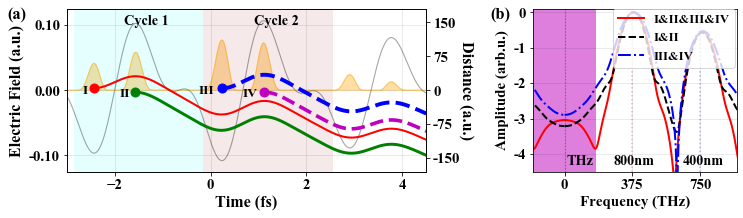

In [41]:
plt.figure(figsize=(12, 3))
ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=3)
ax1.plot(field[:, 0]/41, field[:, 2], c = 'black', lw = 1.1, alpha=0.35)
ax1.plot(field[:, 0]/41, W(field[:, 2]), c = 'orange', lw = 1.1, alpha=0.35)
ax1.fill_between(field[:, 0]/41,0, W(field[:, 2]), color = 'orange', alpha=0.35)
ax1.set_ylim(-0.125, 0.125)
ax1.set_xlim(-3, 4.5)
ax1.grid(True, linestyle = '-',color='black', alpha=0.1)
plt.tick_params(axis='both', which='major', labelsize=Size)
for label in (ax1.get_xticklabels()):
    label.set_fontname('Times New Roman')
ax1.set_yticks(np.linspace(-0.1,0.1, 3))
ax1.set_yticklabels(('-0.10','0.00','0.10'),**nofont)
ax2.set_ylabel('Distance (a.u.)', labelpad = 15, size = Size, rotation = -90, **nofont)
ax1.set_xlabel('Time (fs)', size = Size+1, **nofont)
ax1.set_ylabel('Electric Field (a.u.)', size = Size+1, **nofont)

ax1.axvspan(-2.85, -0.15, facecolor='cyan', alpha=0.1)
ax1.axvspan(-0.15, 2.55, facecolor='brown', alpha=0.1)

ax1.text(-4.25, 0.11, '(a)', fontsize = 1.1*Size, **nofont)
ax1.text(-2.68, -0.006, 'I', fontsize = 0.9*Size, **nofont)
ax1.text(-1.9, -0.01, 'II', fontsize = 0.9*Size, **nofont)
ax1.text(-0.24, -0.006, 'III', fontsize = 0.9*Size, **nofont)
ax1.text(0.68, -0.01, 'IV', fontsize = 0.9*Size, **nofont)
ax1.text(-1.8, 0.1, 'Cycle 1', fontsize = 0.95*Size, **nofont)
ax1.text(0.9, 0.1, 'Cycle 2', fontsize = 0.95*Size, **nofont)

ax2 = ax1.twinx()
cons = 1700
ax2.plot(traj_9[:, 0]/41, traj_9[:, 5], linewidth = traj_9_w * cons, color='r')
ax2.plot(traj_9[0, 0]/41, traj_9[0 ,5], marker='o', color='r', markersize=9) 
ax2.plot(traj_1[:, 0]/41, traj_1[:, 5], linewidth = traj_1_w * cons, color='g')
ax2.plot(traj_1[0, 0]/41, traj_1[0 ,5], marker='o', color='g', markersize=9) 
ax2.plot(traj_10[:, 0]/41, traj_10[:, 5], linewidth = traj_10_w * cons, color='b',ls='--')
ax2.plot(traj_10[0, 0]/41, traj_10[0 ,5], marker='o', color='b', markersize=9) 
ax2.plot(traj_11[:, 0]/41, traj_11[:, 5], color = 'm', linewidth = traj_11_w * cons,ls='--')
ax2.plot(traj_11[0, 0]/41, traj_11[0 ,5], marker='o', color='m', markersize=9) 

ax2.set_ylim(-180,180)
Yscale=linspace(-150, 150, 5)
ax2.set_yticks(Yscale)
ax2.set_yticklabels(('-150','-75','0','75','150'), size = Size)
ax2.set_ylabel('Distance (a.u.)', labelpad = 13, size = Size+1, rotation = -90, **nofont)
for l in ax2.yaxis.get_ticklabels():
    l.set_family("Times New Roman")

ax3 = plt.subplot2grid((1, 5), (0, 3), colspan=2)
ax3.plot(spec0[:, 0] * 41300 / (2*pi), log(spec2[:, 1]), c='r', lw=2, label='I&II&III&IV')
ax3.plot(spec1[:, 0] * 41300 / (2*pi), log(spec0[:, 1]), c='black', lw=2, label='I&II', ls='--') 
ax3.plot(spec2[:, 0] * 41300 / (2*pi), log(spec1[:, 1]), c='b', lw=2, label='III&IV', ls='-.')
ax3.legend(loc=(0.393,0.639),fontsize='large',prop={'size':0.85*Size, 'family':'Times New Roman'},frameon=1)
ax3.text(10, -4.3, 'THz', fontsize = 0.95*Size, **nofont)
ax3.text(270, -4.3, '800nm', fontsize = 0.95*Size, **nofont)
ax3.text(650, -4.3, '400nm', fontsize = 0.95*Size, **nofont)

ax3.set_xlim(-175,950)
ax3.set_ylim(-4.5,0.1)
ax3.set_yticks(linspace(-4, 0, 5))
ax3.set_yticklabels(('-4','-3','-2','-1','0'), size = Size, **nofont)
ax3.set_xticks(linspace(0, 750, 3))
ax3.set_xticklabels(('0','375','750'), size = Size, **nofont)
ax3.set_xlabel('Frequency (THz)', size = Size, **nofont)
ax3.set_ylabel('Amplitude (arb.u.)', size = Size, **nofont)
ax3.grid(True, linestyle = '-',color='black', alpha=0.1)
ax3.axvspan(-175, 175, facecolor='m', alpha=0.5)
ax3.axvline(x=375, lw=1.5, c='r', alpha=0.3, ls=":")
ax3.axvline(x=750, lw=1.5, c='b', alpha=0.3, ls=":")
ax3.axvline(x=0, lw=1.2, c='black', alpha=0.3, ls=":")
ax3.text(-410, -0.16, '(b)', fontsize = 1.1*Size, **nofont)
plt.subplots_adjust(wspace=2.2)
plt.savefig('fig3/fig3.pdf',dpi=200, bbox_inches='tight')